<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/PredictionTester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.externals import joblib
import cv2 
import numpy as np
import math
reg = joblib.load('AQImodel.pkl')
from google.colab.patches import cv2_imshow 

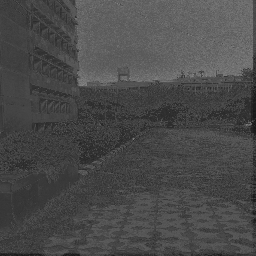

[50.62986097]


In [15]:
'''      hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans        '''

img1path = '/content/ldr3.jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 995, 36.51, 2000, 240, 4.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))

# test = np.reshape(test,x_test[0].shape)

print(reg.predict(test))

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont